In [3]:
from myphdlib.interface.mlati import MlatiSession
import matplotlib.pylab as plt
import os
import re
import numpy as np
import nptracer as npt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.ndimage.filters import gaussian_filter1d
import warnings
warnings.filterwarnings("ignore")
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import pathlib as pl

/tmp/ipykernel_651218/2606310509.py:10: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [4]:
sessionsMlati = list()
sessionsMlatiList = ['/media/onecore/Seagate Portable Drive/2023-07-24/mlati9',
                     '/media/onecore/Seagate Portable Drive/2023-07-25/mlati10',
                     '/media/onecore/Seagate Portable Drive/2023-07-26/mlati9',
                     '/media/onecore/Seagate Portable Drive/2023-07-27/mlati10',
                     '/media/onecore/Seagate Portable Drive/2023-07-28/mlati9',
                     '/media/onecore/Seagate Portable Drive/2023-07-31/mlati10',
                     '/media/onecore/Seagate Portable Drive/2023-08-01/mlati10'
                  ]
                  
for session in sessionsMlatiList:
    sessionToAppend = MlatiSession(session)
    sessionsMlati.append(sessionToAppend)

Exception: Could not locate metadata file

In [6]:
keys = list()
for session in sessionsMlati:
    keys.append(str(session.date))
premotorUnitsZeta = {key:[] for key in keys}
for session in sessionsMlati:
    spikeClustersFile = session.home.joinpath('ephys/sorting/manual/spike_clusters.npy')
    uniqueSpikeClusters = np.unique(np.load(spikeClustersFile))
    zetaNasal = session.load('zeta/saccade/nasal/p')
    zetaTemporal = session.load('zeta/saccade/temporal/p')
    ampCutoff = session.load('metrics/ac')
    presenceRatio = session.load('metrics/pr')
    firingRate = session.load('metrics/fr')
    isiViol = session.load('metrics/rpvr')
    qualityLabels = session.load('metrics/ql')
    for index, pVal in enumerate(zetaNasal):
        pNasal = pVal
        pTemporal = zetaTemporal[index]
        if pNasal < pTemporal:
            p = pNasal
        elif pTemporal < pNasal:
            p = pTemporal
        if p < 0.05:
            if qualityLabels is not None and qualityLabels[index] in (0, 1):
                    continue
            if ampCutoff[index] <= 0.1:
                if presenceRatio[index] >= 0.9:
                    if firingRate[index] >= 0.2:
                        if isiViol[index] <= 0.5:
                            date = str(session.date)
                            unit = uniqueSpikeClusters[index]
                            premotorUnitsZeta[date].append(unit)

In [7]:
keys = list()
for session in sessionsMlati:
    keys.append(str(session.date))
visualUnitsZeta = {key:[] for key in keys}
for session in sessionsMlati:
    spikeClustersFile = session.home.joinpath('ephys/sorting/manual/spike_clusters.npy')
    uniqueSpikeClusters = np.unique(np.load(spikeClustersFile))
    zetaLeft = session.load('zeta/probe/left/p')
    zetaRight = session.load('zeta/probe/right/p')
    ampCutoff = session.load('metrics/ac')
    presenceRatio = session.load('metrics/pr')
    firingRate = session.load('metrics/fr')
    isiViol = session.load('metrics/rpvr')
    qualityLabels = session.load('metrics/ql')
    for index, pVal in enumerate(zetaLeft):
        pLeft = pVal
        pRight = zetaRight[index]
        if pLeft < pRight:
            p = pLeft
        elif pRight < pLeft:
            p = pRight
        if p < 0.05:
            if qualityLabels is not None and qualityLabels[index] in (0, 1):
                    continue
            if ampCutoff[index] <= 0.1:
                if presenceRatio[index] >= 0.9:
                    if firingRate[index] >= 0.2:
                        if isiViol[index] <= 0.5:
                            date = str(session.date)
                            unit = uniqueSpikeClusters[index]
                            visualUnitsZeta[date].append(unit)

In [8]:
#initialize data
session = sessionsMlati[0]
trials = list()
for trial in session.saccadeTimestamps[:,0]:
    unitArray = np.zeros((len(session.population), 5))
    for i, unit in enumerate(session.population):
        spikeTimes = unit.timestamps
        t1 = trial - 0.3
        t2 = trial - 0.2
        t3 = trial - 0.1
        t5 = trial + 0.1
        t6 = trial + 0.2
        mask1 = np.logical_and(spikeTimes >= t1, spikeTimes < t2)
        a = len(spikeTimes[mask1])/0.3
        mask2 = np.logical_and(spikeTimes >= t2, spikeTimes < t3)
        b = len(spikeTimes[mask2])/0.3
        mask3 = np.logical_and(spikeTimes >= t3, spikeTimes < trial)
        c = len(spikeTimes[mask3])/0.3
        mask4 = np.logical_and(spikeTimes >= trial, spikeTimes < t5)
        d = len(spikeTimes[mask4])/0.3
        mask5 = np.logical_and(spikeTimes >= t5, spikeTimes < t6)
        e = len(spikeTimes[mask5])/0.3
        fr = [a, b, c, d, e]
        unitArray[i, :] = fr
    trials.append(unitArray)

KeyboardInterrupt: 

In [9]:
#initialize data
session = sessionsMlati[0]
trials = list()
for trial in session.saccadeTimestamps[:,0]:
    unitArray = np.zeros((len(session.population), 10))
    for ind, unit in enumerate(session.population):
        if unit.cluster in premotorUnitsZeta[str(session.date)]:
            spikeTimes = unit.timestamps
            t1 = trial - 0.5
            t2 = trial - 0.4
            t3 = trial - 0.3
            t4 = trial - 0.2
            t5 = trial - 0.1
            t6 = trial + 0.1
            t7 = trial + 0.2
            t8 = trial + 0.3
            t9 = trial + 0.4
            t10 = trial + 0.5
            mask1 = np.logical_and(spikeTimes >= t1, spikeTimes < t2)
            a = len(spikeTimes[mask1])/0.3
            mask2 = np.logical_and(spikeTimes >= t2, spikeTimes < t3)
            b = len(spikeTimes[mask2])/0.3
            mask3 = np.logical_and(spikeTimes >= t3, spikeTimes < t4)
            c = len(spikeTimes[mask3])/0.3
            mask4 = np.logical_and(spikeTimes >= t4, spikeTimes < t5)
            d = len(spikeTimes[mask4])/0.3
            mask5 = np.logical_and(spikeTimes >= t5, spikeTimes < trial)
            e = len(spikeTimes[mask5])/0.3
            mask6 = np.logical_and(spikeTimes >= trial, spikeTimes < t6)
            f = len(spikeTimes[mask6])/0.3
            mask7 = np.logical_and(spikeTimes >= t6, spikeTimes < t7)
            g = len(spikeTimes[mask7])/0.3
            mask8 = np.logical_and(spikeTimes >= t7, spikeTimes < t8)
            h = len(spikeTimes[mask8])/0.3
            mask9 = np.logical_and(spikeTimes >= t8, spikeTimes < t9)
            i = len(spikeTimes[mask9])/0.3
            mask10 = np.logical_and(spikeTimes >= t9, spikeTimes < t10)
            j = len(spikeTimes[mask10])/0.3
            fr = [a, b, c, d, e, f, g, h, i, j]
            unitArray[ind, :] = fr
    trials.append(unitArray)

In [10]:
trial_type_tmp = session.load('saccades/predicted/left/labels')
trial_size = trials[0].shape[1]
time = np.arange(-0.5, 0.5, 0.1)
start_stim = 0
end_stim = 0.1
trial_type = list()

for element in trial_type_tmp:
    if element == -1:
        trial_type.append('Ipsi')
    elif element == 1:
        trial_type.append('Contra')
trial_types = np.unique(trial_type)
t_type_ind = [np.argwhere(np.array(trial_type) == t_type)[:, 0] for t_type in trial_types]

In [1]:
session.listAllDatasets()

NameError: name 'session' is not defined

In [11]:
def z_score(X):
    # X: ndarray, shape (n_features, n_samples)
    ss = StandardScaler(with_mean=True, with_std=True)
    Xz = ss.fit_transform(X.T).T
    return Xz
shade_alpha      = 0.2
lines_alpha      = 0.8
pal = sns.color_palette('husl', 2)
%config InlineBackend.figure_format = 'svg'

def add_stim_to_plot(ax):
    ax.axvspan(start_stim, end_stim, alpha=shade_alpha,
               color='gray')
    ax.axvline(start_stim, alpha=lines_alpha, color='gray', ls='--')
    ax.axvline(end_stim, alpha=lines_alpha, color='gray', ls='--')
    
def add_orientation_legend(ax):
    custom_lines = [Line2D([0], [0], color=pal[k], lw=4) for
                    k in range(len(trial_types))]
    labels = ['{}'.format(t) for t in trial_types]
    ax.legend(custom_lines, labels,
              frameon=False, loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout(rect=[0,0,0.9,1])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

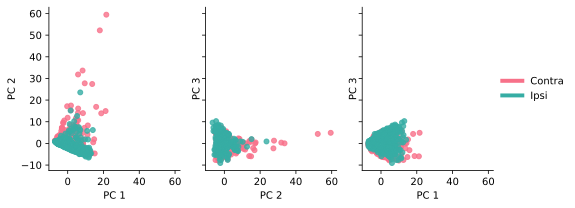

In [280]:
#trial response PCA
Xr = np.vstack([t.mean(axis=1) for t in trials]).T
Xr_sc = z_score(Xr)

pca = PCA(n_components=15)
Xp = pca.fit_transform(Xr_sc.T).T

projections = [(0, 1), (1, 2), (0, 2)]
fig, axes = plt.subplots(1, 3, figsize=[9, 3], sharey='row', sharex='row')
for ax, proj in zip(axes, projections):
    for t, t_type in enumerate(trial_types):
        x = Xp[proj[0], t_type_ind[t]]
        y = Xp[proj[1], t_type_ind[t]]
        ax.scatter(x, y, c=pal[t], s=25, alpha=0.8)
        ax.set_xlabel('PC {}'.format(proj[0]+1))
        ax.set_ylabel('PC {}'.format(proj[1]+1))
sns.despine(fig=fig, top=True, right=True)
add_orientation_legend(axes[2])
base = pl.Path('/home/retina2/Documents/NPData/')
fp = base.joinpath(f'trialresponsepcapremotor{4}.jpeg')
plt.savefig(fp)

In [12]:
#trial averaged pca
trial_averages = []
for ind in t_type_ind:
    trial_averages.append(np.array(trials)[ind].mean(axis=0))
Xa = np.hstack(trial_averages)
print(Xa.shape)
n_components = 10
Xa = z_score(Xa) #Xav_sc = center(Xav)
pca = PCA(n_components=n_components)
Xa_p = pca.fit_transform(Xa.T).T



(615, 20)


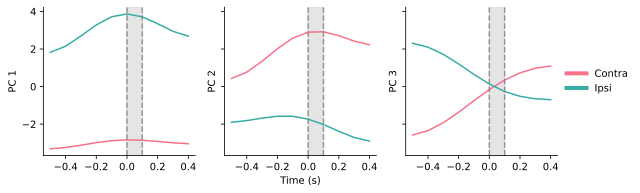

In [20]:
fig, axes = plt.subplots(1, 3, figsize=[10, 2.8], sharey='row')
pcs = np.zeros((3, 10, 2))
for comp in range(3):
    ax = axes[comp]
    for kk, type in enumerate(trial_types):
        x = Xa_p[comp, kk * trial_size :(kk+1) * trial_size]
        x = gaussian_filter1d(x, sigma=3)
        pcs[comp, :, kk] = x
        ax.plot(time, x, c=pal[kk])
    add_stim_to_plot(ax)
    ax.set_ylabel('PC {}'.format(comp+1))
add_orientation_legend(axes[2])
axes[1].set_xlabel('Time (s)')
sns.despine(fig=fig, right=True, top=True)
plt.tight_layout(rect=[0, 0, 0.9, 1])
#base = pl.Path('/home/retina2/Documents/NPData/')
##fp = base.joinpath(f'trialaveragedpcapremotor{4}.jpeg')
#plt.savefig(fp)

In [17]:
pcs.shape

(3, 10)

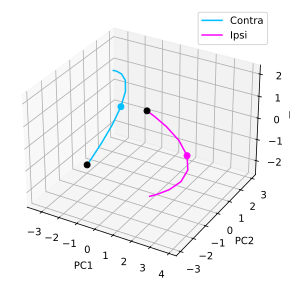

In [29]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(pcs[0,:, 0], pcs[1,:, 0], pcs[2,:, 0], color='deepskyblue', label=trial_types[0])
ax.plot(pcs[0,:, 1], pcs[1,:, 1], pcs[2,:, 1], color='magenta', label=trial_types[1])
ax.plot(pcs[0,4, 1], pcs[1,4, 1], pcs[2,4, 1], color='magenta', marker='o')
ax.plot(pcs[0,4, 0], pcs[1,4, 0], pcs[2,4, 0], color='deepskyblue', marker='o')
ax.plot(pcs[0,0, 0], pcs[1,0, 0], pcs[2,0, 0], color='k', marker='o')
ax.plot(pcs[0,0, 1], pcs[1,0, 1], pcs[2,0, 1], color='k', marker='o')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
fig.tight_layout()

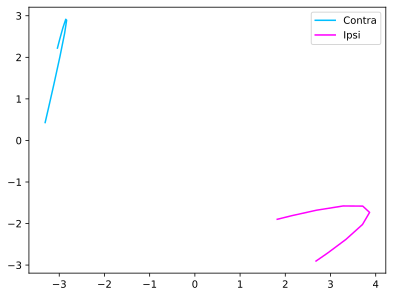

In [22]:
ax = plt.figure().add_subplot()
ax.plot(pcs[0,:, 0], pcs[1,:, 0], color='deepskyblue', label=trial_types[0])
ax.plot(pcs[0,:, 1], pcs[1,:, 1], color='magenta', label=trial_types[1])
ax.legend()

1362
1362


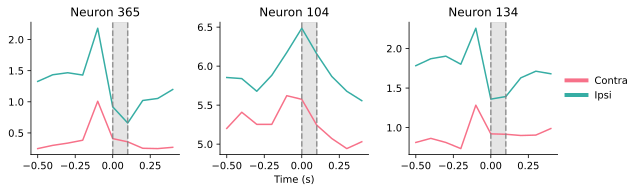

In [283]:
#which units feature most prominently in a component
import pandas as pd
units = np.abs(pca.components_[1, :].argsort())[::-1][0:3]
print(len(trials))
print(len(trial_type_tmp))
f, axes = plt.subplots(1, 3, figsize=[10, 2.8], sharey=False,
                       sharex=True)

colors=['green', 'pink']
labels=['contra', 'ipsi']
trial_arr = np.array(trials)
for ax, unit in zip(axes, units):
    ax.set_title('Neuron {}'.format(unit))
    #print(np.array(trials).shape)
    #sns.lineplot(data=test_df, x='fr', y='time', hue='direction', ax=ax)
    for t, ind in enumerate(t_type_ind):
        x = np.array(trials)[ind][:, unit, :]
        df = pd.DataFrame(x)#.melt()
        cols = df.columns.tolist()
        #sns.lineplot(data=df, hue=trial_type_tmp)
        ax.plot(np.expand_dims(time, axis=1),np.array(trials)[ind][:, unit, :].mean(axis=0), color = pal[t] , label=ind)
for ax in axes:
    add_stim_to_plot(ax)
axes[1].set_xlabel('Time (s)')
sns.despine(fig=f, right=True, top=True)
add_orientation_legend(axes[2])
base = pl.Path('/home/retina2/Documents/NPData/')
fp = base.joinpath(f'unitfeaturepremotor{4}.jpeg')
plt.savefig(fp)


In [284]:
#trial concatenated PCA
Xl = np.hstack(trials)
Xl = z_score(Xl)
pca = PCA(n_components=15)
Xl_p = pca.fit_transform(Xl.T).T
gt = {comp : {t_type : [] for t_type in trial_types} for comp in range(n_components)}
for comp in range(n_components):
    for i, t_type in enumerate(trial_type):
        t = Xl_p[comp, trial_size * i: trial_size * (i + 1)]
        gt[comp][t_type].append(t)
for comp in range(n_components):
    for t_type in trial_types:
        gt[comp][t_type] = np.vstack(gt[comp][t_type])

In [214]:
z = (gt[comp][t_type].mean(axis=0))
print(z)

[-0.02845869 -0.04502523 -0.22429199 -0.19002247 -0.04683557 -0.07491592
 -0.00262958 -0.05759475 -0.19287916 -0.23082814]


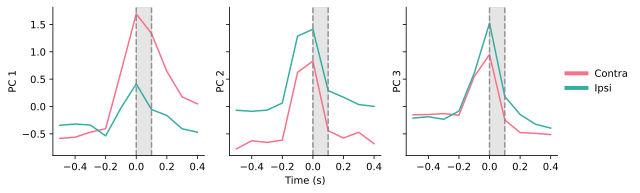

In [285]:
f, axes = plt.subplots(1, 3, figsize=[10, 2.8], sharey=True, sharex=True)
for comp in range(3):
    ax = axes[comp]
    for t, t_type in enumerate(trial_types):
        ax.plot(np.expand_dims(time, axis=1), gt[comp][t_type].mean(axis=0), color = pal[t] , label=ind)
       # sns.tsplot(gt[comp][t_type], time=time, ax=ax,
               #    err_style='ci_band',
                #   ci=95,
                 #  color=pal[t])
    add_stim_to_plot(ax)
    ax.set_ylabel('PC {}'.format(comp+1))
axes[1].set_xlabel('Time (s)')
sns.despine(right=True, top=True)
add_orientation_legend(axes[2])
base = pl.Path('/home/retina2/Documents/NPData/')
fp = base.joinpath(f'trialconcatenatedpcapremotor{4}.jpeg')
plt.savefig(fp)

In [286]:
#averaged concatenated PCA
trial_averages = []
for ind in t_type_ind:
    trial_averages.append(np.array(trials)[ind].mean(axis=0))
Xav = np.hstack(trial_averages)

ss = StandardScaler(with_mean=True, with_std=True)
Xav_sc = ss.fit_transform(Xav.T).T
pca = PCA(n_components=15) 
pca.fit(Xav_sc.T) # only call the fit method

projected_trials = []
for trial in trials:
    # scale every trial using the same scaling applied to the averages 
    trial = ss.transform(trial.T).T
    # project every trial using the pca fit on averages
    proj_trial = pca.transform(trial.T).T
    projected_trials.append(proj_trial)

gt = {comp: {t_type: [] for t_type in trial_types} for comp in range(n_components)}
for comp in range(n_components):
    for i, t_type in enumerate(trial_type):
        t = projected_trials[i][comp, :]
        gt[comp][t_type].append(t)



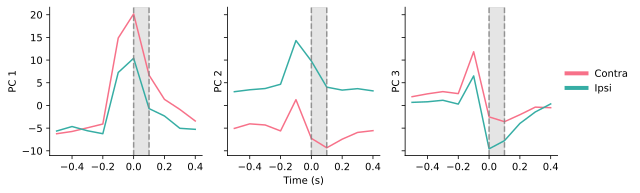

In [287]:
f, axes = plt.subplots(1, 3, figsize=[10, 2.8], sharey=True, sharex=True)
for comp in range(3):
    ax = axes[comp]
    for t, t_type in enumerate(trial_types):
        ax.plot(np.expand_dims(time, axis=1), np.array(gt[comp][t_type]).mean(axis=0), color = pal[t] , label=ind)
        #sns.tsplot(gt[comp][t_type], time=time, ax=ax,
                #   err_style='ci_band',
                #   ci=95,
                #   color=pal[t])
    add_stim_to_plot(ax)
    ax.set_ylabel('PC {}'.format(comp+1))
axes[1].set_xlabel('Time (s)')
sns.despine(right=True, top=True)
add_orientation_legend(axes[2])
base = pl.Path('/home/retina2/Documents/NPData/')
fp = base.joinpath(f'averagedconcatenatedpcapremotor{4}.jpeg')
plt.savefig(fp)